In [225]:
import numpy as np
import pandas as pd

In [226]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [227]:
X = df.copy()
X_test = df_test.copy()

In [228]:
X.shape

(1460, 81)

In [229]:
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [230]:
X_full = X.drop('SalePrice', axis=1)
y = X['SalePrice']

# Feature Engineering

In [231]:
total_null_col = [col for col in X_full.columns if X_full[col].isnull().any()]
total_null_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [232]:
drop_col = [col for col in X_full.columns if (X_full[col].isnull().sum() > 300)]
drop_col

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [233]:
null_col = list(set(total_null_col) - set(drop_col))
null_col

['MasVnrArea',
 'BsmtQual',
 'BsmtFinType1',
 'LotFrontage',
 'GarageYrBlt',
 'Electrical',
 'GarageCond',
 'BsmtFinType2',
 'GarageType',
 'GarageFinish',
 'BsmtExposure',
 'MasVnrType',
 'GarageQual',
 'BsmtCond']

In [234]:
for col in null_col:
    print(X_full[col].value_counts())

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtF

In [235]:
X_full.drop(drop_col, axis=1, inplace=True)
X_test.drop(drop_col, axis=1, inplace=True)

In [236]:
cat_null_col = [col for col in null_col if X_full[col].dtype == 'object']
num_null_col = list(set(null_col) - set(cat_null_col))

In [237]:
cat_col = [col for col in X_full.columns if X_full[col].dtype == 'object']
num_col = list(set(X_full.columns) - set(cat_col))

ordinal_col = []

In [238]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


#Imputing values
#For numerical features
num_imp = SimpleImputer(strategy = 'median')

#For categorical columns
cat_imp = SimpleImputer(strategy="most_frequent")
oh_enc = OneHotEncoder(handle_unknown='ignore')
ord_enc = OrdinalEncoder()
lab_enc = LabelEncoder()

num_imp.fit(X_full[num_col])
cat_imp.fit(X_full[cat_col])

X_full[num_col] = pd.DataFrame(num_imp.transform(X_full[num_col]))

X_full[cat_col] = pd.DataFrame(cat_imp.transform(X_full[cat_col]))

X_test[num_col] = pd.DataFrame(num_imp.transform(X_test[num_col]))

X_test[cat_col] = pd.DataFrame(cat_imp.transform(X_test[cat_col]))


In [239]:
X_full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,...,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,WD,Normal
1456,1457.0,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,WD,Normal
1457,1458.0,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,...,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,WD,Normal
1458,1459.0,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal


In [240]:
#Encoding values
ord_enc.fit(X_full[cat_col])
X_full[cat_col] = pd.DataFrame(ord_enc.transform(X_full[cat_col]))
X_test[cat_col] = pd.DataFrame(ord_enc.transform(X_test[cat_col]))

In [241]:
X_full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8.0,4.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8.0,4.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8.0,4.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8.0,0.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3.0,62.0,7917.0,1.0,3.0,3.0,0.0,4.0,...,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8.0,4.0
1456,1457.0,20.0,3.0,85.0,13175.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8.0,4.0
1457,1458.0,70.0,3.0,66.0,9042.0,1.0,3.0,3.0,0.0,4.0,...,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,8.0,4.0
1458,1459.0,20.0,3.0,68.0,9717.0,1.0,3.0,3.0,0.0,4.0,...,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,8.0,4.0


In [242]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold = 0.3)
var.fit(X_full)
var.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [243]:
low_var_col = [col for col in X_full.columns if col not in X_full.columns[list(var.get_support())]]

X_full.drop(low_var_col, axis=1, inplace=True)
X_test.drop(low_var_col, axis=1, inplace=True)



In [244]:
X_full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,3.0,65.0,8450.0,3.0,3.0,4.0,5.0,2.0,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8.0,4.0
1,2.0,20.0,3.0,80.0,9600.0,3.0,3.0,2.0,24.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8.0,4.0
2,3.0,60.0,3.0,68.0,11250.0,0.0,3.0,4.0,5.0,2.0,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8.0,4.0
3,4.0,70.0,3.0,60.0,9550.0,0.0,3.0,0.0,6.0,2.0,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8.0,0.0
4,5.0,60.0,3.0,84.0,14260.0,0.0,3.0,2.0,15.0,2.0,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3.0,62.0,7917.0,3.0,3.0,4.0,8.0,2.0,...,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8.0,4.0
1456,1457.0,20.0,3.0,85.0,13175.0,3.0,3.0,4.0,14.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8.0,4.0
1457,1458.0,70.0,3.0,66.0,9042.0,3.0,3.0,4.0,6.0,2.0,...,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,8.0,4.0
1458,1459.0,20.0,3.0,68.0,9717.0,3.0,3.0,4.0,12.0,2.0,...,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,8.0,4.0


In [245]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,2.0,80.0,11622.0,3.0,3.0,4.0,12.0,1.0,...,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,8.0,4.0
1,1462.0,20.0,3.0,81.0,14267.0,0.0,3.0,0.0,12.0,2.0,...,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,8.0,4.0
2,1463.0,60.0,3.0,74.0,13830.0,0.0,3.0,4.0,8.0,2.0,...,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,8.0,4.0
3,1464.0,60.0,3.0,78.0,9978.0,0.0,3.0,4.0,8.0,2.0,...,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,8.0,4.0
4,1465.0,120.0,3.0,43.0,5005.0,0.0,1.0,4.0,22.0,2.0,...,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,4.0,21.0,1936.0,3.0,3.0,4.0,10.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,8.0,4.0
1455,2916.0,160.0,4.0,21.0,1894.0,3.0,3.0,4.0,10.0,2.0,...,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,8.0,0.0
1456,2917.0,20.0,3.0,160.0,20000.0,3.0,3.0,4.0,11.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,8.0,0.0
1457,2918.0,85.0,3.0,62.0,10441.0,3.0,3.0,4.0,11.0,2.0,...,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,8.0,4.0


In [268]:
corr_df = df.corr()
filt = (corr_df['SalePrice'] > 0.5)
k = list(corr_df[filt].index)
# X_Train = X_full[cols] 
# X_Test = X_test[cols]
high_cor_col = k[:-1]
high_cor_col
X_full = X_full[high_cor_col]
X_test = X_test[high_cor_col]

In [269]:
X_full
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5.0,1961.0,1961.0,882.0,896.0,896.0,1.0,5.0,1.0,730.0
1,6.0,1958.0,1958.0,1329.0,1329.0,1329.0,1.0,6.0,1.0,312.0
2,5.0,1997.0,1998.0,928.0,928.0,1629.0,2.0,6.0,2.0,482.0
3,6.0,1998.0,1998.0,926.0,926.0,1604.0,2.0,7.0,2.0,470.0
4,8.0,1992.0,1992.0,1280.0,1280.0,1280.0,2.0,5.0,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...
1454,4.0,1970.0,1970.0,546.0,546.0,1092.0,1.0,5.0,0.0,0.0
1455,4.0,1970.0,1970.0,546.0,546.0,1092.0,1.0,6.0,1.0,286.0
1456,5.0,1960.0,1996.0,1224.0,1224.0,1224.0,1.0,7.0,2.0,576.0
1457,5.0,1992.0,1992.0,912.0,970.0,970.0,1.0,6.0,0.0,0.0


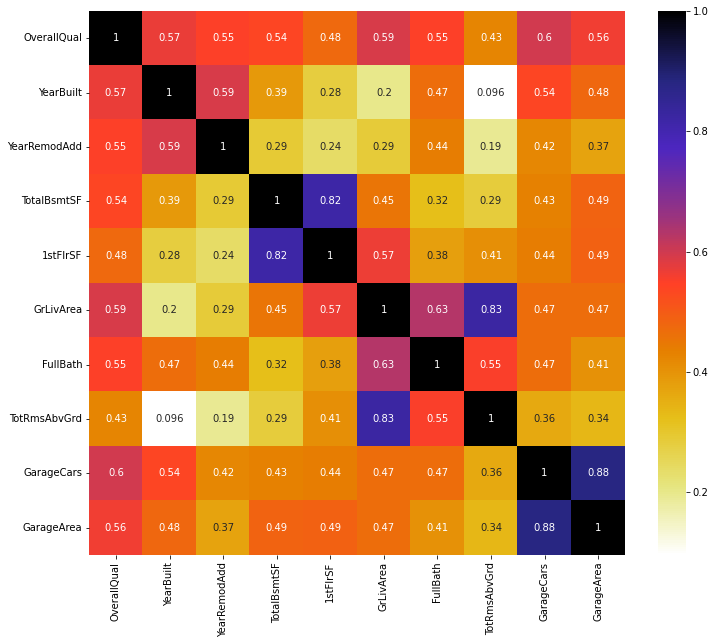

In [270]:
#Visualizing the pearson correlation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
cor = X_full.corr()
sns.heatmap(cor, annot=True,  cmap=plt.cm.CMRmap_r)
plt.show()

In [271]:
def correlation(corr_data, threshold):
    high_cor = set() #empty set
    for i in range(len(corr_data.columns)):
        for j in range(i):
            if abs(corr_data.iloc[i,j]) > threshold:
                high_cor.add(corr_data.columns[i])
 
    return high_cor

In [272]:
high_corr = correlation(cor,0.8)
print(high_corr)

{'TotRmsAbvGrd', '1stFlrSF', 'GarageArea'}


In [273]:
X_full.drop(high_corr, axis=1, inplace=True)
X_test.drop(high_corr, axis=1, inplace=True)

/home/vicky/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [274]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars
0,5.0,1961.0,1961.0,882.0,896.0,1.0,1.0
1,6.0,1958.0,1958.0,1329.0,1329.0,1.0,1.0
2,5.0,1997.0,1998.0,928.0,1629.0,2.0,2.0
3,6.0,1998.0,1998.0,926.0,1604.0,2.0,2.0
4,8.0,1992.0,1992.0,1280.0,1280.0,2.0,2.0
...,...,...,...,...,...,...,...
1454,4.0,1970.0,1970.0,546.0,1092.0,1.0,0.0
1455,4.0,1970.0,1970.0,546.0,1092.0,1.0,1.0
1456,5.0,1960.0,1996.0,1224.0,1224.0,1.0,2.0
1457,5.0,1992.0,1992.0,912.0,970.0,1.0,0.0


In [275]:
X_full.shape, y.shape

((1460, 7), (1460,))

In [276]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators = 100, learning_rate=0.01)
scores = cross_val_score(xgb_model, X_full, y, cv=5, scoring = "neg_mean_absolute_error" )
#np.sqrt(-1*scores.mean())
scores.mean()

-68346.83450074914

In [277]:
xgb_model.fit(X_full, y)
predict = xgb_model.predict(X_test)

In [278]:
X_test.Id = X_test['Id'].astype('int64')

KeyError: 'Id'

In [279]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars
0,5.0,1961.0,1961.0,882.0,896.0,1.0,1.0
1,6.0,1958.0,1958.0,1329.0,1329.0,1.0,1.0
2,5.0,1997.0,1998.0,928.0,1629.0,2.0,2.0
3,6.0,1998.0,1998.0,926.0,1604.0,2.0,2.0
4,8.0,1992.0,1992.0,1280.0,1280.0,2.0,2.0
...,...,...,...,...,...,...,...
1454,4.0,1970.0,1970.0,546.0,1092.0,1.0,0.0
1455,4.0,1970.0,1970.0,546.0,1092.0,1.0,1.0
1456,5.0,1960.0,1996.0,1224.0,1224.0,1.0,2.0
1457,5.0,1992.0,1992.0,912.0,970.0,1.0,0.0


In [208]:
output = pd.DataFrame({'id': X_test.Id,
                       'SalePrice': predict})
output.to_csv('submission.csv', index=False)

In [224]:
list(X_full.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'Electrical',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']